#**Usage of Detectron2**

# Install detectron2

In [1]:
!pip install torch
!pip install torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-366eezw9
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-366eezw9
  Resolved https://github.com/facebookresearch/fvcore.git to commit 9d683aae73fb899dd35d6cf6720e5ef567761c57
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.6-py3-none-any.whl size=65324 sha256=1907ab5adab1c8b4186ea9935b90851b80b67e81b65aa95336e8ae409ce94951
  Stored in directory: /tmp/pip-ephem-wheel-cache-kx22y4n9/wheels/8f/cb/6a/3b7ac0e01781855ca3d1417ebf9e15e20d5b7fe37ab063aa50
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31530 sha256=f748ef18765f88961bd212bedf6e40b05f2b065a73264d0cef10190065563ab2
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e47

'2.1.0+cu118'

In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo
!pip install 'click<8.0,>=5.1' --force-reinstall

fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/detectron2_repo
  Preparing metadata (setup.py) ... done
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.6
    Can't uninstall 'detectron2'. No files were found to uninstall.
  Running setup.py develop for detectron2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Attempting uninstall: click
    Found existing installation: click 8.1.3
    Uninstalling click-8.1.3:
      Successfully uninstalled click-8.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
black 23.1.0 requires click>=8.0.0, but you have click 7.1.

In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

ModuleNotFoundError: ignored

# Train on a custom COCO dataset

In this section, it is shown how to train an existing detectron2 model on a custom dataset in a new format.

The cells segmentation dataset is used. It only has one class.

A segmentation model is going to be trained from an existing model pre-trained on the COCO dataset, available in detectron2's model zoo.

Note that the COCO dataset does not have the cells category.

In [ ]:
# Please upload your data in .zip format
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving COCO_dataset.zip to COCO_dataset.zip
User uploaded file "COCO_dataset.zip" with length 9401599 bytes


In [ ]:
# Unzip your uploaded file
!unzip COCO_dataset.zip > /dev/null

Register the cells dataset to detectron2, following the [detectron2 custom dataset tutorial](https://detectron2.readthedocs.io/tutorials/datasets.html).


In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("cells", {}, "./COCO_dataset/trainval.json", "./COCO_dataset/images")

In [ ]:
cells_metadata = MetadataCatalog.get("cells")
dataset_dicts = DatasetCatalog.get("cells")

[01/02 14:31:27 d2.data.datasets.coco]: Loaded 13 images in COCO format from ./COCO_dataset/trainval.json


To verify the data loading is correct, let's visualize the annotations of randomly selected samples in the training set:



In [ ]:
import random

#for d in random.sample(dataset_dicts, 3):
for d in dataset_dicts:
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=cells_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dataset_dicts


[{'file_name': './COCO_dataset/images/0000.jpg',
  'height': 278,
  'width': 237,
  'image_id': 0,
  'annotations': [{'iscrowd': 0,
    'bbox': [0.0, 0.0, 237.0, 280.0],
    'category_id': 0,
    'segmentation': [[29.16722322874216,
      83.01440457411354,
      0.0,
      280.45406950714005,
      237.8250509420543,
      210.90146026936736,
      130.1306882513145,
      0.0,
      4.487265112115665,
      65.06534412565725,
      29.16722322874216,
      83.01440457411354]],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>}]},
 {'file_name': './COCO_dataset/images/0001.jpg',
  'height': 404,
  'width': 495,
  'image_id': 1,
  'annotations': [{'iscrowd': 0,
    'bbox': [0.0, 0.0, 495.0, 403.0],
    'category_id': 0,
    'segmentation': [[365.7121066373111,
      100.96346502257256,
      0.0,
      271.4795392829119,
      291.6722322874257,
      403.8538600902816,
      495.84279488862285,
      89.74530224228647,
      336.54488340856915,
      0.0,
      365.7121066373111,
      100.96346

Now, let's fine-tune a coco-pretrained R50-FPN Mask R-CNN model on the fruits_nuts dataset. It takes ~6 minutes to train 300 iterations on Colab's K80 GPU.


In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("cells",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # 1 class (cells)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[06/17 07:19:28 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:03, 47.9MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to i

[06/17 07:19:38 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/17 07:19:46 d2.utils.events]:  eta: 0:01:40  iter: 19  total_loss: 2.122  loss_cls: 0.4404  loss_box_reg: 0.815  loss_mask: 0.5643  loss_rpn_cls: 0.117  loss_rpn_loc: 0.1576  time: 0.3593  data_time: 0.0160  lr: 0.0012854  max_mem: 1862M
[06/17 07:19:53 d2.utils.events]:  eta: 0:01:33  iter: 39  total_loss: 1.33  loss_cls: 0.2825  loss_box_reg: 0.6343  loss_mask: 0.2579  loss_rpn_cls: 0.04987  loss_rpn_loc: 0.12  time: 0.3553  data_time: 0.0080  lr: 0.0026174  max_mem: 1862M
[06/17 07:20:00 d2.utils.events]:  eta: 0:01:26  iter: 59  total_loss: 1.242  loss_cls: 0.2242  loss_box_reg: 0.5317  loss_mask: 0.2449  loss_rpn_cls: 0.04132  loss_rpn_loc: 0.1575  time: 0.3536  data_time: 0.0094  lr: 0.0039494  max_mem: 1862M
[06/17 07:20:07 d2.utils.events]:  eta: 0:01:17  iter: 79  total_loss: 1.215  loss_cls: 0.2447  loss_box_reg: 0.5103  loss_mask: 0.2408  loss_rpn_cls: 0.03611  loss_rpn_loc: 0.126  time: 0.3524  data_time: 0.0099  lr: 0.0052814  max_mem: 1862M
[06/17 07:20:14 d2.utils.ev

Now, we perform inference with the trained model on the cells dataset. First, let's create a predictor using the model we just trained:



In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("cells", )
predictor = DefaultPredictor(cfg)

[06/17 07:21:51 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

Then, we randomly select several samples to visualize the prediction results.

In [ ]:
# Please upload your data in .zip format
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cells.jpg to cells.jpg
User uploaded file "cells.jpg" with length 8937 bytes


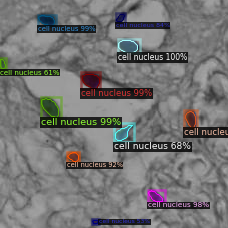

In [ ]:
from detectron2.utils.visualizer import ColorMode

#for d in random.sample(dataset_dicts, 3):
im = cv2.imread("cells.jpg")
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                metadata=cells_metadata,
                scale=1,
                instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
cells_metadata

## Benchmark inference speed

In [ ]:
import time
times = []
for i in range(20):
    start_time = time.time()
    outputs = predictor(im)
    delta = time.time() - start_time
    times.append(delta)
mean_delta = np.array(times).mean()
fps = 1 / mean_delta
print("Average(sec):{:.2f},fps:{:.2f}".format(mean_delta, fps))

Average(sec):0.39,fps:2.59
